In [1]:
import inca

no mapping exists!or smth went wrong
WHATS WRONG?


In [2]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# running scraper and retrieving first article 
mijnscraper = inca.scrapers.news_scraper.nu()   # make an instance of a nu.nl scraper
mijnscraper.run() # run the scraper. It takes the last articles from nu.nl and puts them into ELastic Search
inca.core.document_class.doctype_first('nu')  # retrieve one article from elasticsearch
mijntekst = inca.core.document_class.doctype_first('nu')  # play around
type(mijntekst)
mijntekst[0]['_source'].keys()
#print(mijntekst[0]['_source']['text'])

In [ ]:
from inca import Inca
client = Inca()

In [135]:
from scrapers.parliamentanswers_scraper import parliamentanswers_NL

par = parliamentanswers_NL()
par = par.run()

#par = inca.scrapers.news_scraper.parliamentanswers()

In [14]:
#Retreiving docs from ES with generator
#del doc
#del generator
from inca import Inca
client = Inca() # assumes elasticsearch is running
generator = client.database.doctype_generator('nu') # in case of nrc and nos, ('nos (www)'))
for doc in generator:
    print(doc['_source'].keys())
    

SyntaxError: unexpected EOF while parsing (<ipython-input-14-099b59dbfea7>, line 9)

## Query practice

In [19]:
#Simple Queries

#connect to our cluster
from elasticsearch import Elasticsearch
es = Elasticsearch([{'host': '127.0.0.1', 'port': 9200}])
#print (help(es.explain))
#print (help(es.info))
#print (help(es.get))

In [129]:
help(es.get)

In [61]:
es.get(index='inca',doc_type='nu',id = 'put smth')

In [58]:
print ( es.search(index='inca', body={"query": {"match": {'doctype':'nu'}}}).get('hits').get('hits')[2].keys() )

dict_keys(['_index', '_type', '_id', '_score', '_source'])


In [103]:
es.search(index='inca', body={'query':{"bool": { 'must': [ {'query_string':{'query':'*'}}]}},
                             'aggs':{'timeline' : {"date_histogram": {
                                 "field":'META.ADDED',
                                 "interval":'1d'
                             } }}})   #get('hits').get('hits')[0]

{'_shards': {'failed': 0, 'successful': 5, 'total': 5},
 'aggregations': {'timeline': {'buckets': [{'doc_count': 10,
     'key': 1509580800000,
     'key_as_string': '2017-11-02T00:00:00.000Z'},
    {'doc_count': 19,
     'key': 1509667200000,
     'key_as_string': '2017-11-03T00:00:00.000Z'},
    {'doc_count': 0,
     'key': 1509753600000,
     'key_as_string': '2017-11-04T00:00:00.000Z'},
    {'doc_count': 0,
     'key': 1509840000000,
     'key_as_string': '2017-11-05T00:00:00.000Z'},
    {'doc_count': 199,
     'key': 1509926400000,
     'key_as_string': '2017-11-06T00:00:00.000Z'}]}},
 'hits': {'hits': [{'_id': 'https://www.nu.nl/-/4991282/',
    '_index': 'inca',
    '_score': 1.0,
    '_source': {'META': {'ADDED': '2017-11-03T13:54:30.738721',
      '_id': {'ADDED_AT': '2017-11-03T13:54:30.738721',
       'ADDED_METHOD': None,
       'ADDED_USING': "'scrapers.news_scraper.nu'>",
       'FUNCTION_ARGUMENTS': {},
       'FUNCTION_TYPE': 'scraper',
       'FUNCTION_VERSION': '.1',


In [78]:
res = es.search(index="inca", doc_type="nrc (www)", body={"query": {"match": {"title_rss": "amsterdam"}}})
print("%d documents found" % res['hits']['total'])
for doc in res['hits']['hits']:
    print("%s) %s" % (doc['_id'], doc['_source']['title_rss']))

1 documents found
http://www.nrc.nl/1579930) NRC checkt: ‘Eindhoven ontvangt 125 keer minder  dan Amsterdam’


In [127]:
es.search(index='inca', doc_type = 'nrc (www)', body={"query": {"query_string": {'query': 'Trump'}}})

In [128]:
es.search(index='inca', doc_type = 'nrc (www)', body={"query": {"query_string": {'query': 'Texas', 'fields':['teaser_rss']}}})

# there are two articles where Texas is mentioned in the teaser_rss, but there are five 'hits'

In [ ]:
res = es.search(index="inca", body={"query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])

In [91]:
inca.core.search_utils.doctype_fields('nrc (www)')

{'byline': {'coverage': 0.0, 'type': 'text'},
 'category': {'coverage': 0.0, 'type': 'text'},
 'doctype': {'coverage': 0.0, 'type': 'text'},
 'feedurl': {'coverage': 0.0, 'type': 'text'},
 'htmlsource': {'coverage': 0.0, 'type': 'text'},
 'publication_date': {'coverage': 0.0, 'type': 'date'},
 'teaser': {'coverage': 0.0, 'type': 'text'},
 'teaser_rss': {'coverage': 0.0, 'type': 'text'},
 'text': {'coverage': 0.0, 'type': 'text'},
 'title': {'coverage': 0.0, 'type': 'text'},
 'title_rss': {'coverage': 0.0, 'type': 'text'},
 'url': {'coverage': 0.0, 'type': 'text'}}

### GETTING TIMELINE 

In [93]:
from analysis import timeline_analysis as ta

In [21]:
#examining parliamnetnews data 
inca.core.search_utils.doctype_first('parliamentary answers NL', num = 1)[0]['_index']

'inca'

In [172]:
proba = ta.timeline_generator()
smth = proba.analyse(queries=['Rutte','goed'],timefield = 'META.ADDED', granularity = 'day')

In [173]:
smth =  smth.fillna(0,axis=0)
df = smth[smth['1. Rutte   ']!=0]

## Statsmodels testing

In [4]:
# generate two arbitrary sample to work with, put them in df, add time trend
sample1 = np.random.gamma(4,3,50)
sample2 = np.random.binomial(10,0.7,size=50)

# create a pandas dataframe with counts of mentions of a particular word (two arrays)
df = pd.DataFrame({'x':sample1, 'y':sample2})
df['t'] = df.index
df['x'] = df.x.astype('int')
df = df.drop(['t'],axis=1)

#make index a date object
import datetime
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 50)]

df.index = date_list

In [116]:
#import statsmodels.api as sm
print(type(df['x']))
#print(df['x'])

<class 'pandas.core.series.Series'>


In [61]:
#VAR
#REQUIREMENTS 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib as plt
import pandas as pd
  
#create a model 
model = VAR(df)

#Fit a model with some lags
res = model.fit()
#res.summary()

#predict based on new input
x1 = np.linspace(20.5,25, 10)
y1 = np.linspace(20.5,25, 10)
data = {"x" : x1, "y" : y1}
par = res.params
print(par)
smth = model.predict(params=par,start=len(df)-1,end=len(df)+len(df)-1,)
print(smth)



               x         y
const  12.089939  5.810706
L1.x   -0.273843  0.011540
L1.y    0.054825  0.139894


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# Perform ADF test 
X = df.x
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
summary_adf = pd.DataFrame(columns=['ADF_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
for name in df.columns:
    series = df[name]
   
    result = adfuller(series)
    #print(result)
    dic = {'ADF_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[4]['1%'],'Critical_val_5%':result[4]['5%'],'Critical_val_10%':result[4]['10%']}
    #print(dic)
    summary_adf = summary_adf.append(dic,ignore_index=True)
    #print (summary_adf)
summary_adf.set_index(df.columns,inplace=True)  
print (summary_adf)    

In [114]:
#Perform kpss test 
#REQUIREMENTS
from statsmodels.tsa.stattools import kpss

X = df.x
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
print()

summary_kpss = pd.DataFrame(columns=['KPSS_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
for name in df.columns:
    series = df[name]
    #rint(series)
    result = kpss(series)
    #print(result)
    dic = {'KPSS_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[3]['1%'],'Critical_val_5%':result[3]['5%'],'Critical_val_10%':result[3]['10%']}
    #print(dic)
    summary_kpss = summary_kpss.append(dic,ignore_index=True)
    #print (summary_kpss)
summary_kpss.set_index(df.columns,inplace=True)  
print (summary_kpss)

KPSS Statistic: 0.161782
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

   KPSS_Stat   p-value  Critical_val_1%  Critical_val_5%  Critical_val_10%
x   0.161782  0.100000            0.739            0.463             0.347
y   0.367041  0.091362            0.739            0.463             0.347


C:\Users\HP\Anaconda2\envs\inca362\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


C:\Users\HP\Anaconda2\envs\inca362\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


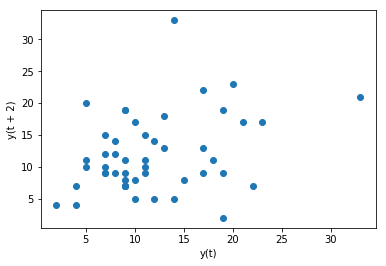

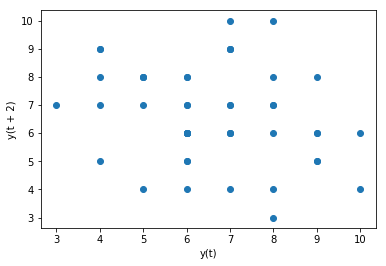

Help on function wrapper in module pandas.tools.plotting:

wrapper(*args, **kwargs)

None


In [8]:
# Plotting functionality to see the time sereis process 
#REQUIREMENTS
#from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

#lag plots for each variable in dataset
for name in df.columns:
    series = df[name]
    lag_plot(series,2)
    pyplot.show()    

print(help(lag_plot))

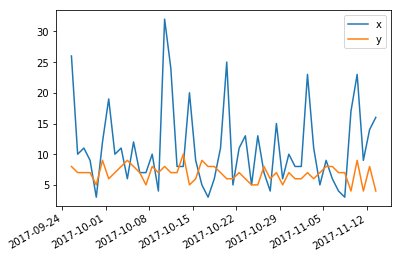

In [134]:
# Line plots for each variable
#REQUIREMENTS
from matplotlib import pyplot

for name in df.columns:
    series = df[name]
    series.plot(legend=True)
pyplot.show()


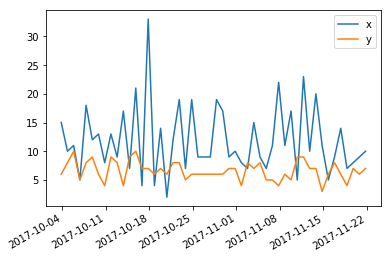

C:\Users\HP\Anaconda2\envs\inca362\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


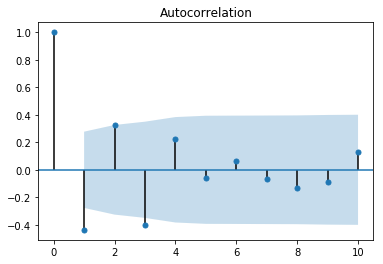

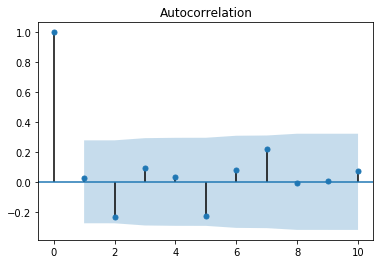

In [5]:
#Autpcorrelations plot 
#from pandas import Series
from matplotlib import pyplot

for name in df.columns:
    series = df[name]
    series.plot(legend=True)
pyplot.show()
from pandas.tools.plotting import autocorrelation_plot
for name in df.columns:
    series = df[name]
    #autocorrelation_plot(series)
    #pyplot.show()
    

#Another way - A BETTER WAY, YOU CAN INDICATE THE NUMBER OF LAGS ! 
from statsmodels.graphics.tsaplots import plot_acf
for name in df.columns:
    series = df[name]
    plot_acf(series, lags=10)
    pyplot.show()


In [25]:
# AUTOCORRELATIONS  TABLE
from statsmodels.tsa.stattools import acf

for name in df.columns:
    series = df[name]
    smth = acf(series,nlags=2,qstat=True)
    proba = smth
    print(proba)

(array([ 1.        , -0.27437445,  0.08509168]), array([ 3.99452014,  4.38671899]), array([ 0.04564845,  0.1115414 ]))
(array([ 1.        ,  0.13583276, -0.27254284]), array([ 0.97900821,  5.00248645]), array([ 0.32244379,  0.08198301]))


In [24]:
summary_acf = pd.DataFrame(columns=['Auto_cor','Q-value','p-value'])
for name in df.columns:
    series = df[name]
    #rint(series)
    result = acf(series)
    #print(result)
    dic = {'Auto_cor':result[0],'Q-value':result[1]}
    #print(dic)
    summary_acf = summary_acf.append(dic,ignore_index=True)
    #print (summary_kpss)
summary_kpss.set_index(df.columns,inplace=True)  
print (summary_acf)

(array([ 1.        , -0.27437445,  0.08509168]), array([[ 1.        ,  1.        ],
       [-0.59135667,  0.04260776],
       [-0.25491702,  0.42510038]]), array([ 3.99452014,  4.38671899]), array([ 0.04564845,  0.1115414 ]))
(array([ 1.        ,  0.13583276, -0.27254284]), array([[ 1.        ,  1.        ],
       [-0.18114945,  0.45281498],
       [-0.59532056,  0.05023489]]), array([ 0.97900821,  5.00248645]), array([ 0.32244379,  0.08198301]))


In [115]:
# Blueprint of the class VAR 
#requirements: 
from core import analysis_base_class
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import kpss
import matplotlib as plt

class VAR(Analysis):
    def adf_test(df):
        """ 
        H_0: the observed time series is stationary 
        
        Returns: dataframe of summary of the test 
        """
        summary_adf = pd.DataFrame(columns=['ADF_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
        for name in df.columns:
            series = df[name]
            result = adfuller(series)
            dic = {'ADF_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[4]['1%'],'Critical_val_5%':result[4]['5%'],
                   'Critical_val_10%':result[4]['10%']}
            summary_adf = summary_adf.append(dic,ignore_index=True)
        summary_adf.set_index(df.columns,inplace=True)  
    
        return summary_adf             
        
    def kpss_test(df):
        """ 
        H_0: there is a unit root in time series, hence stochastic trend with drift, hence non-stationary
        
        Returns: dataframe of summary of the test
        """
        summary_kpss = pd.DataFrame(columns=['KPSS_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
        for name in df.columns:
            series = df[name]
            result = kpss(series)
            dic = {'KPSS_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[3]['1%'],'Critical_val_5%':result[3]['5%'],
                   'Critical_val_10%':result[3]['10%']}
            summary_kpss = summary_kpss.append(dic,ignore_index=True)
        summary_kpss.set_index(df.columns,inplace=True)  
        
        return summary_kpss
    
    def model(df):
        """   
        """
        model = VAR(df)
        
        return model 
        
    def fit(self,model, nlags):
        """
        This method creates and fits a Vector AutoRegressive model to timeline dataframe
        @df - dataframe with columns representing queries (eg count number of documents whcich mention a word or phrase) 
        @nlags -  number of lags to consider 
        """
        
        result = model.fit(nlags)
        
        return result 
        raise NotImplementedError

    def predict(self, documents, add_prediction='', **kwargs):
        """
        This method should perform inference on new unseen documents.\n
        @param documents: the documents (dictionaries) to perform inference on
        @type documents: iterable
        @param add_prediction: this switch signals the mutation of the given documents by adding a key, value pair document.\
                               If given (add_prediction != ''), then key=add_prediction and value should be the model's output:\n
                                 * For classification tasks: class labels\n
                                 * For clustering tasks: assigned cluster\n
        @type add_prediction: str
        """
        raise NotImplementedError

    def update(self, documents, **kwargs):
        """
        This method should provide online training functionality. In most cases this should basically result in some weight updating based on new evidence.\n
        @param documents: the documents (dictionaries) presented as new evidence to the model. Expected functionality for weight updating
        @type documents: iterable
        """
        raise NotImplementedError

    def interpretation(self, **kwargs):
        """
        This method should have the functionality to interpret the status of the model after being trained and also document the various design choices\
        (i.e. parameters settings, assumptions, model selection, test method, dataset used). For example it can return a report-like looking formatted string.\n
        Please consider the following as possible model state interpretation:\n
           * For classification tasks depending on the underlying model: coeficient/feature weights, feature selection (random forest)\n
           * For clustering tasks: clusterings members/structure, distributions
        """
        raise NotImplementedError

    def quality(self, **kwargs):
        """
        This method should have the functionality to report on the quality of the underlying (trained) model used for the analysis (on a dataset).\n
           * For classification tasks: retrieval metrics precision, recall, f1-score on a test set internally handled; intrinsic evaluation on hidden evidence.\n
           * For clustering tasks take into consideration application and underlying clustering method since it optimizes against given metric. Example metrics:\n
             - inertia: sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.\n
             - silhouette
        """
        raise NotImplementedError

    def plot(self, figure_names, **kwargs):
        """
        This method should write one or more figure files on disk, visualing the model and its behaviour.\n
           * For classification tasks:\n
             - ROC curve: plot the true positive rate against the false positive rate at various threshold settings.\n
             - pre-rec curve: shows the tradeoff between precision and recall at various threshold settings.\n
           * For clustering/unsupervised tasks:\n
             - a 2D visualization of the data reduced to 2D\n
        @param figure_names: the file paths to save the created figures to
        @type figure_names: iterable
        """
        
        
        
        
        raise NotImplementedError

ImportError: cannot import name 'analysis_base_class'